У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
data_path = 'Python_study/data/yulu_rental.csv'
df = pd.read_csv(data_path)

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

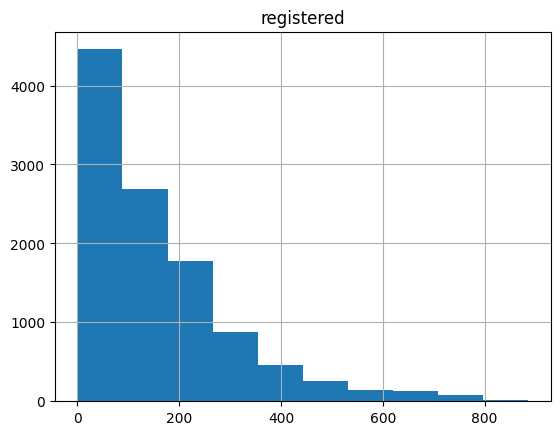

In [6]:
df.hist('registered')
plt.show()

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

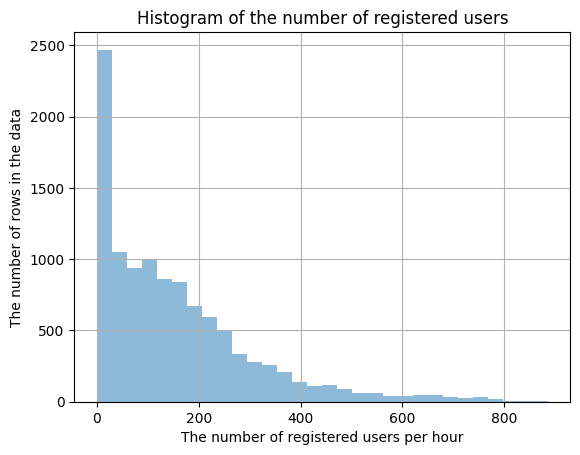

In [14]:
df.hist('registered', bins=30, alpha=0.5)
plt.xlabel('The number of registered users per hour')
plt.ylabel('The number of rows in the data')
plt.title('Histogram of the number of registered users')
plt.show(0)

На мій погляд, відхиленість графіку в одну сторону може свідчити про нерівномірний попит, який залежить від години. Наприклад, це можуть бути години пік, коли люди їдуть на роботу та з роботи, це може залежити від дня тижня (вихідні або робочі дні).

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [30]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [31]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [32]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

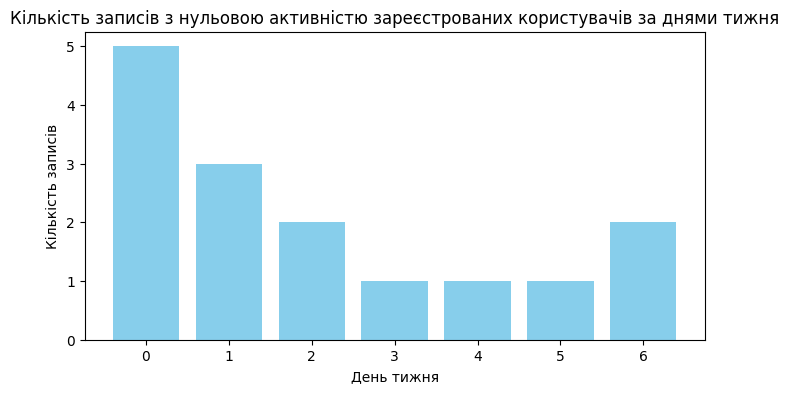

In [46]:
zero_registered_df = df[df['registered'] == 0]
zero_registered_by_day = zero_registered_df.groupby('dayofweek').size().reset_index(name='count')
plt.figure(figsize=(8, 4))
plt.bar(zero_registered_by_day['dayofweek'], zero_registered_by_day['count'], color='skyblue')
plt.xlabel('День тижня')
plt.ylabel('Кількість записів')
plt.title('Кількість записів з нульовою активністю зареєстрованих користувачів за днями тижня')
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих користувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

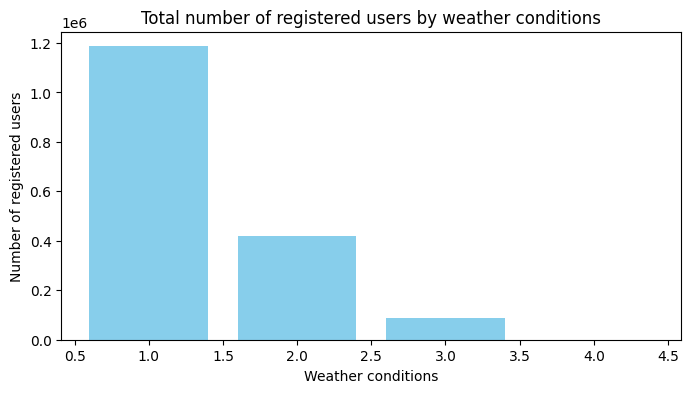

In [70]:
weather_registered_sum = df.groupby('weather')['registered'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(weather_registered_sum['weather'], weather_registered_sum['registered'], color='skyblue')

plt.xlabel('Weather conditions')
plt.ylabel('Number of registered users')
plt.title('Total number of registered users by weather conditions')

plt.show()

Найбільша кількість користувачів зареєстрована за найсприятливіших погодних умов, що в графіку відповідає числу 1. У міру погіршення погоди (2, 3, 4) кількість зареєстрованих користувачів суттєво зменшується, що є цілком зрозумілим. У найгірших погодних умовах (4) кількість зареєстрованих користувачів майже дорівнює нулю, що логічно, адже в таких умовах люди рідко користуються такими послугами. Але без розуміння яке число за яку погоду відповідає - цей графік немає великого логічного сенсу.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

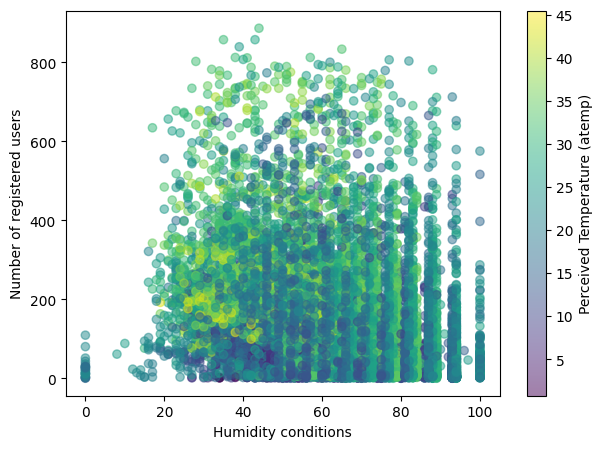

In [87]:
plt.figure(figsize=(7,5))
plt.scatter(df['humidity'], df['registered'], alpha=0.5, c=df['atemp'])

plt.xlabel('Humidity conditions')
plt.ylabel('Number of registered users')
plt.colorbar(label='Perceived Temperature (atemp)');
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)

Найбільша кількість зареєстрованих користувачів спостерігається під час оптимальної вологості або вище середньої, при середній температурі. Найменша кількість користувачів під час найменшої вологості та найбільшої вологості. Результати діаграми розсіювання виглядають логічними. Вологість і температура за відчуттями є важливими факторами, що впливають на поведінку зареєстрованих користувачів. Комфортні умови можуть стимулювати активність користувачів, тоді як надмірно висока вологість або екстремальні температури можуть знижувати кількість реєстрацій.